# Data Exploration: Point Trajectory

Exploring the trajectory of each facial point caputred by nuiCapture as a candidate feature.

<p>
    <img src="nuicapture.png">
    <em>Source: CadavidConcepts</em>
</p>

In [101]:
import glob as gl
import numpy as np
from scipy.io import loadmat
from typing import List
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
%matplotlib notebook

In [102]:
def labelname(file_name):
    label = file_name.replace("data/points/sample", "").lower()
    return label.replace(".mat", "")


class Signal:
    def __init__(self, x, y, label):
        self.x = x
        self.y = y
        self.label = label

def trajvar(sig):
    points_x = np.array(np.split(sig.x, 121, axis=1))
    points_y = np.array(np.split(sig.y, 121, axis=1))
    
    npoints, nrecs, nframes = np.shape(points_x)
    
    var_x = np.empty((nrecs, npoints))
    var_y = np.empty((nrecs, npoints))

    for r in range(nrecs):
        for p in range(npoints):
            var_x[r][p] = points_x[p, r, range(nframes)].var()
            var_y[r][p] = points_y[p, r, range(nframes)].var()

    points_var = var_y

    return np.argsort(points_var, axis=1)

In [103]:
files = gl.glob("data/points/*.mat")  # type: list
signals = []  # type: List[Signal]

for f in files:
    data = loadmat(f).get('pontosSinal')
    signals.append(Signal(data[:, ::2], data[:, 1::2], labelname(f)))

nsigns = len(signals)
nrecs, n_x = np.shape(signals[0].x)  # Number of recordings and number of features
nframes = 5

signals_feat = []  # Updated signals, according to each experiment
signals_labels = []
labels_dict = {}  # Dictionary of signals' labels, for reference
i = 0

for s in signals:
    signals_feat.append(trajvar(s))
    signals_labels.append([i] * nrecs)
    labels_dict[i] = s.label
    i += 1

sig_features = pd.DataFrame(data=np.vstack(signals_feat)) # 100 x 121
sig_labels = np.reshape(signals_labels, (nsigns * nrecs,))

In [104]:
for i in range(nsigns):
    print(signals[i].label)
    result = sig_features.loc[i*10:(i*10+9), 0:11]
    print(result)
    print()
    


acalmar
   0    1   2   3    4    5   6    7    8    9    10   11
0  43   93  19  21   45   89  59   65    4  114   16   44
1  43   59  41  17   16   40  21   69   45    4   44   93
2  19   43  41  21   40   59   4   45   44   69   65   93
3  68   69  16  19  113   93  89   41   17   40   21    4
4  89  113  93  43   41   59  16   17   90   69   40  118
5  16   19  43  41   89  118  17   69   40  113   21   59
6  90   68  69  19   89  113  93  114   21   45  118   59
7  43    4  58  19   16   93  45   21   59   65  113  114
8  90  118  43  19    4   93  21   89  116   16   59   17
9  16   43  59  17    4   65   3   41   45   19   40   21

acusar
    0    1    2    3    4    5    6   7    8    9    10   11
10  58   19   16   65   17  113   93  21   89    4   44   45
11  90   68  113   93  118   69   19  16  114   92   17   89
12  93   19   90  113  114   21   45  43  118   89    4   59
13  19   16   93   21   65   44    4  45  113   17   89   90
14  19   21   45    4   44   43   59  93 

In [105]:
for i in range(nsigns):
    print("Signal: ", signals[i].label)
    result_sorted = pd.DataFrame(np.sort(np.array(sig_features.loc[i*10:(i*10+9), 0:11]), axis=1))
    result_mode = result_sorted.mode(axis=0).loc[0,:]
    print("Mode: ", np.array(result_mode.astype(int)))
    distance_mode = abs(result_sorted-result_mode)/abs(result_sorted-result_mode)
    distance_mode.fillna(0, inplace=True)
    index = distance_mode.sum(axis=1).sort_values(ascending=False).head(3).index
    print("Most distant from mode: ", np.sort(np.array(index)))
    print(distance_mode)
    print()
    


Signal:  acalmar
Mode:  [  4  16  17  21  43  41  43  59  65  89 113 118]
Most distant from mode:  [2 6 9]
    0    1    2    3    4    5    6    7    8    9    10   11
0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0
2  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0
4  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
5  1.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
6  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0
7  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0
8  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0
9  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

Signal:  acusar
Mode:  [  4  16  19  19  21  44  45  65  93 113  93 118]
Most distant from mode:  [6 7 8]
    0    1    2    3    4    5    6    7    8    9    10   11
0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0 

<IPython.core.display.Javascript object>


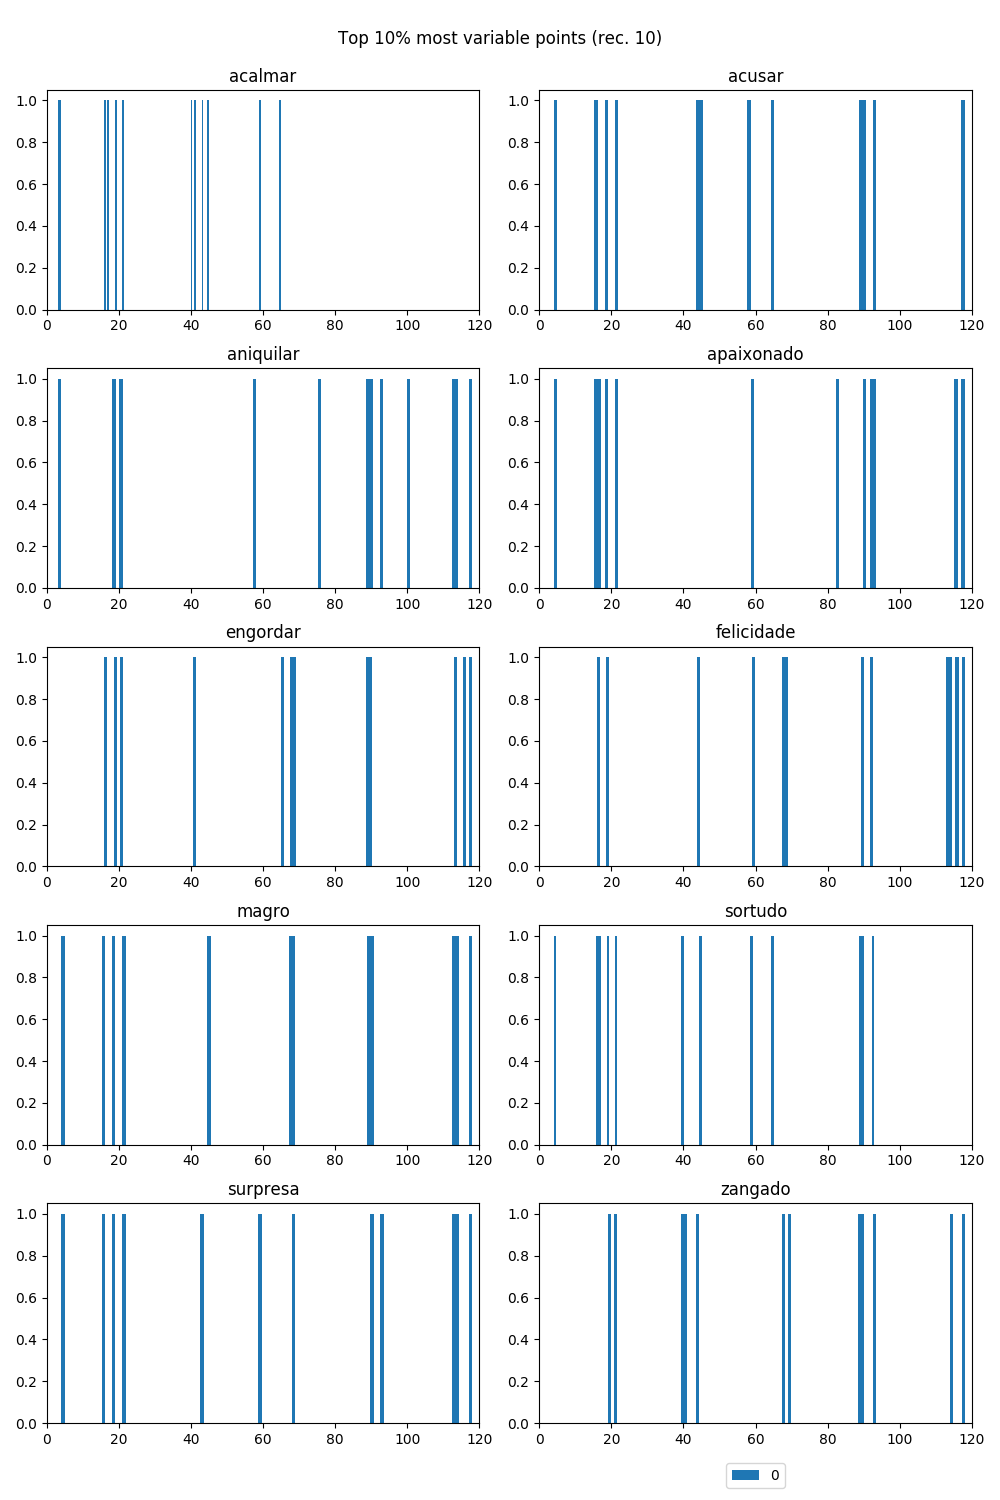

In [106]:
ax = []
fig, axes = plt.subplots(nrows=5, ncols=2)
ax = axes.flatten()

for i in range(len(ax)):
    ax[i].hist(sig_features.loc[(i*10+9), 0:11], bins=121, label=range(11))
    ax[i].set_title(signals[i].label)
    ax[i].set_xlim([0, 120])

fig.suptitle('Top 10% most variable points (rec. 10)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5)
plt.rcParams['figure.figsize'] = [10, 15]
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()